In [ ]:
import glob
import pickle
import datetime
from collections import Counter, OrderedDict

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

from utils import *

radius = 5
srs = ("MensRights", "Feminism")
author_group = pickle.load(open("author_group.pickle"))

fileread = OrderedDict()
author_group_cp = author_group[author_group["cp"].map(len) > 0]
counter1 = author_group_cp.apply(lambda row: cp2corpus(row, ["cp"], radius, srs, fileread), axis=1)
s1 = counter1.apply(cosine_sim, axis=1)
t1 = counter1.apply(jaccard, axis=1)

fileread = OrderedDict()
author_group_mf_only = author_group[(author_group["men_only"].map(len) > 0) & 
                                    (author_group["fem_only"].map(len) > 0)]
counter2 = author_group_mf_only.apply(lambda row: cp2corpus(row, ["men_only", "fem_only"], radius, srs, fileread), axis=1)
s2 = counter2.apply(cosine_sim, axis=1)
t2 = counter2.apply(jaccard, axis=1)

In [13]:
dfs = pd.concat([s1, s2], axis=1, keys=["from_cp", "from_noncp"])
dft = pd.concat([t1, t2], axis=1, keys=["from_cp", "from_noncp"])
dfs.plot(title="cosine similarity")
dft.plot(title="jaccard similarity")

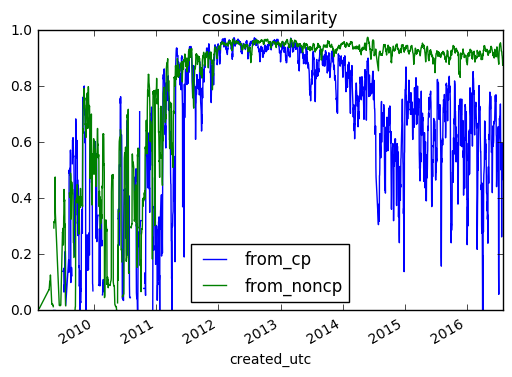

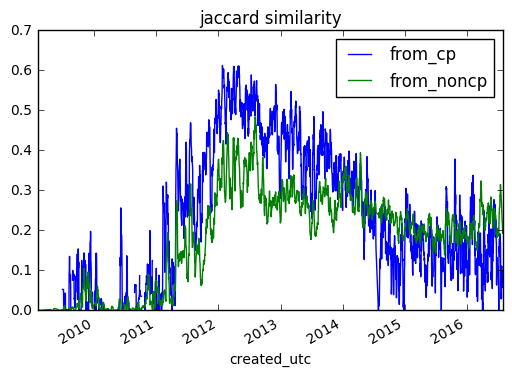

In [14]:
plt.show()